In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


In [2]:
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),  
    index_col="Timestamp",
    parse_dates=True, 
    infer_datetime_format=True
)

display(bitstamp.head())
print(bitstamp.isnull().sum())
print(bitstamp.isnull().mean())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64
Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64


In [3]:
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'),  
    index_col="Timestamp",
    parse_dates=True, 
    infer_datetime_format=True
)

display(coinbase.head())
print(coinbase.isnull().sum())
print(coinbase.isnull().mean())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64
Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64


### Cleaning

In [4]:
# Cleanup nulls
bitstamp = bitstamp.dropna()
coinbase = coinbase.dropna()

In [5]:
# Cleanup the "$"
bitstamp['Close'] = bitstamp['Close'].str.replace('$', '', regex=False)
coinbase['Close'] = coinbase['Close'].str.replace('$', '', regex=False)

In [6]:
# Checking duplicates
print(bitstamp.duplicated().sum())
print(coinbase.duplicated().sum())

0
0


In [7]:
# Fix float types
bitstamp['Close'] = bitstamp['Close'].astype(float)
coinbase['Close'] = coinbase['Close'].astype(float)

### Analysis

In [8]:
# Get close data
bitstamp_sliced = bitstamp.loc[:, ['Close']]
coinbase_sliced = coinbase.loc[:, ['Close']]

display(bitstamp_sliced.head(3))
display(coinbase_sliced.head(3))

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22


,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00


### Summary of statistics

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

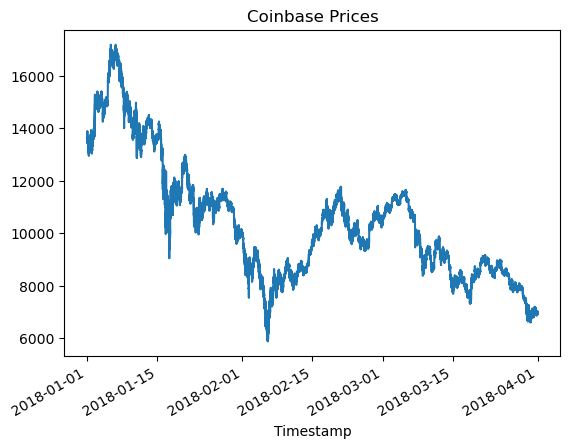

In [9]:
# Statistical summary for bitstamp_sliced
display(bitstamp_sliced.describe())
coinbase['Close'].plot(title='Coinbase Prices')

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

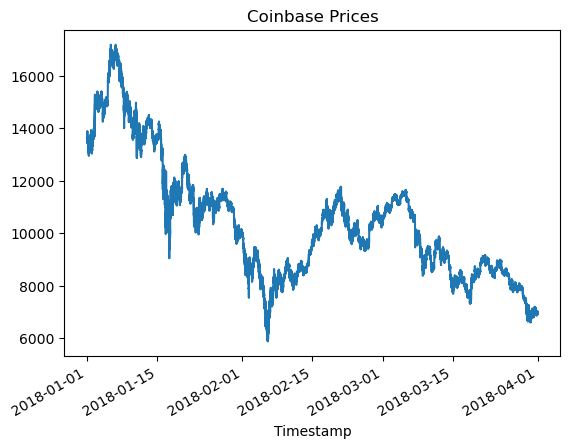

In [10]:
# Statistical summary for coinbase_sliced
display(coinbase_sliced.describe())
coinbase_sliced['Close'].plot(title='Coinbase Prices')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

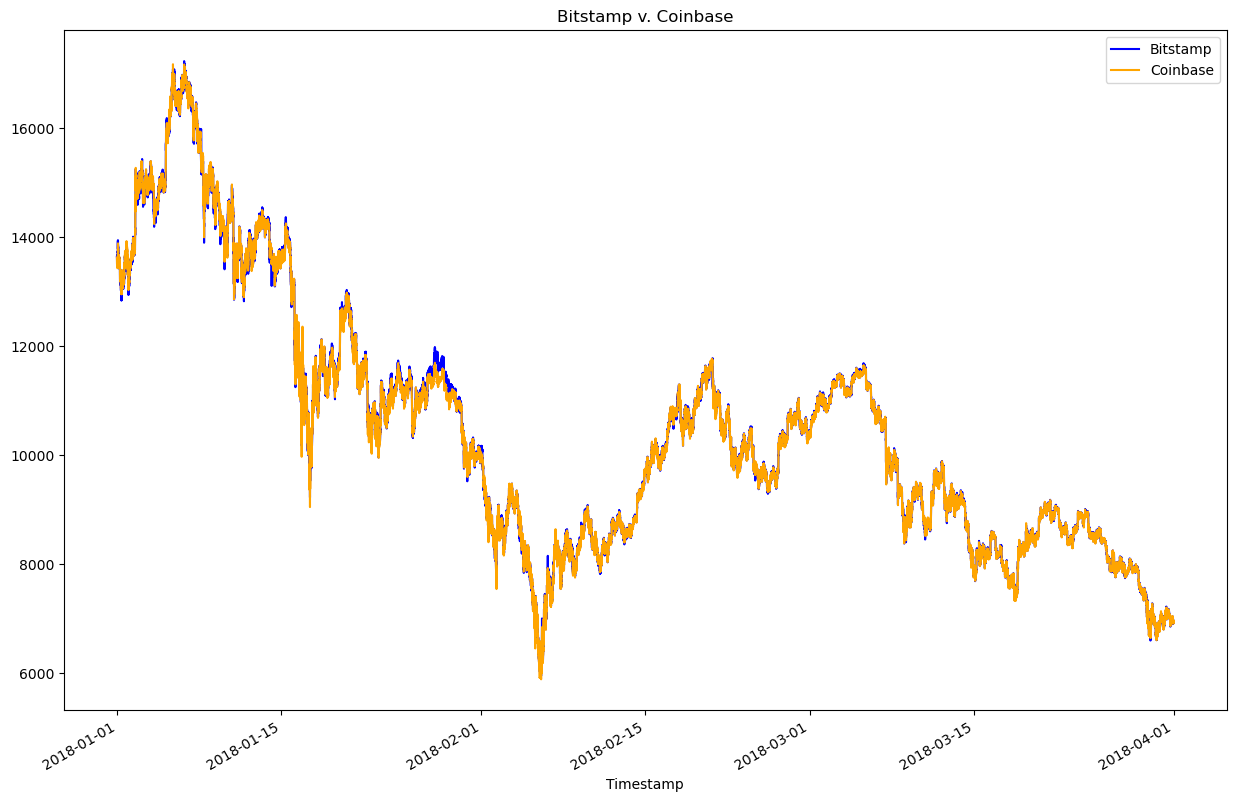

In [11]:
bitstamp['Close'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")

coinbase['Close'].plot(
    legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="orange", label="Coinbase")


<AxesSubplot:title={'center':'Exchange Comparison (January 2018)'}, xlabel='Timestamp'>

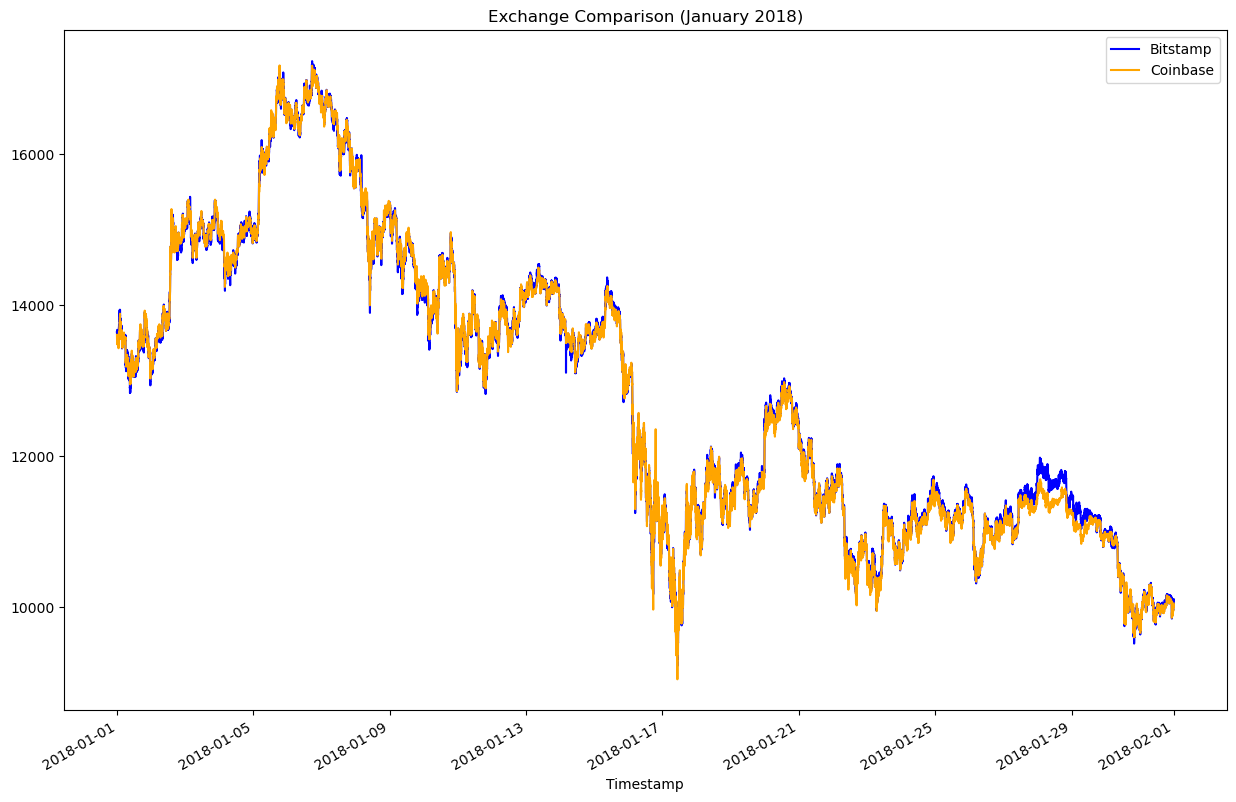

In [12]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01':'2018-01-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (January 2018)", color="blue", label="Bitstamp")

coinbase['Close'].loc['2018-01-01':'2018-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (March 2018)'}, xlabel='Timestamp'>

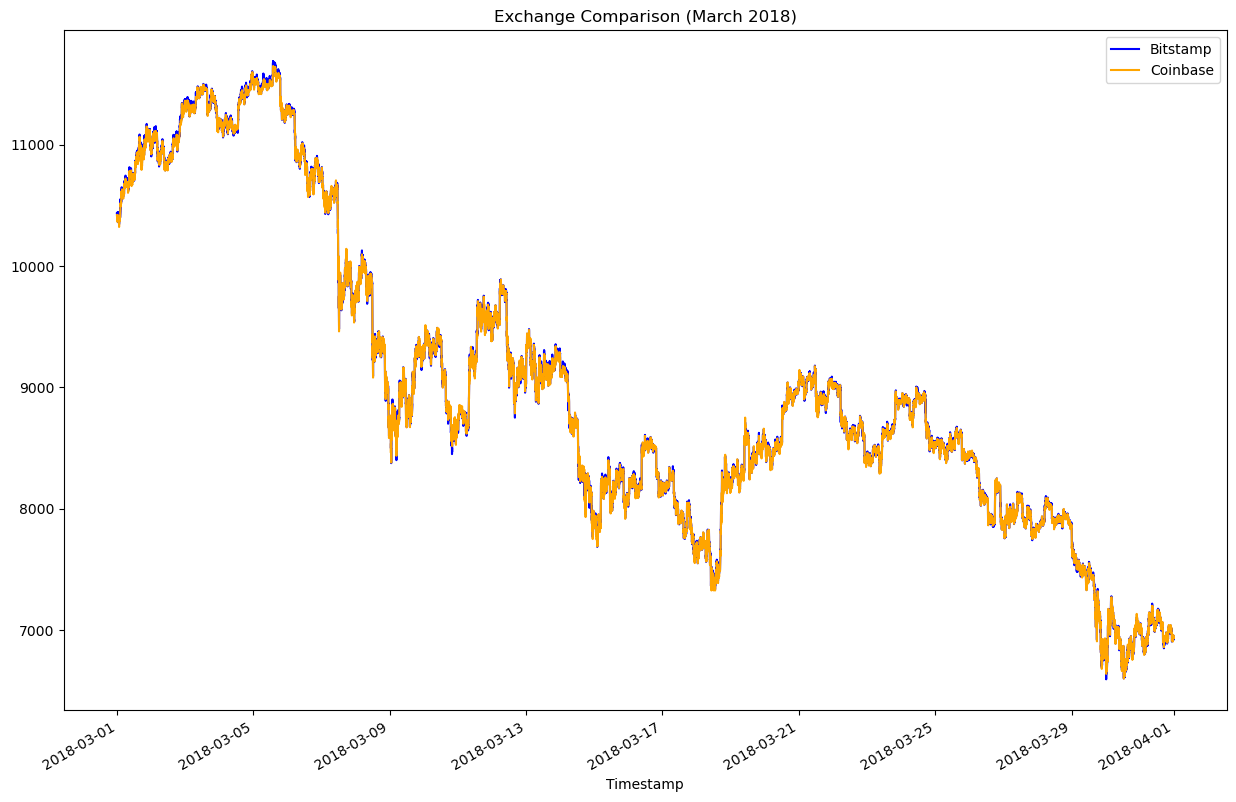

In [13]:
bitstamp['Close'].loc['2018-03-01':'2018-03-31'].plot(
    legend=True, figsize=(15, 10), title="Exchange Comparison (March 2018)", color="blue", label="Bitstamp")

coinbase['Close'].loc['2018-03-01':'2018-03-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, as time has progressed, the difference between the price of bitstamp and the price of coinbase has narrowed. 

### Analysis of Specific Dates

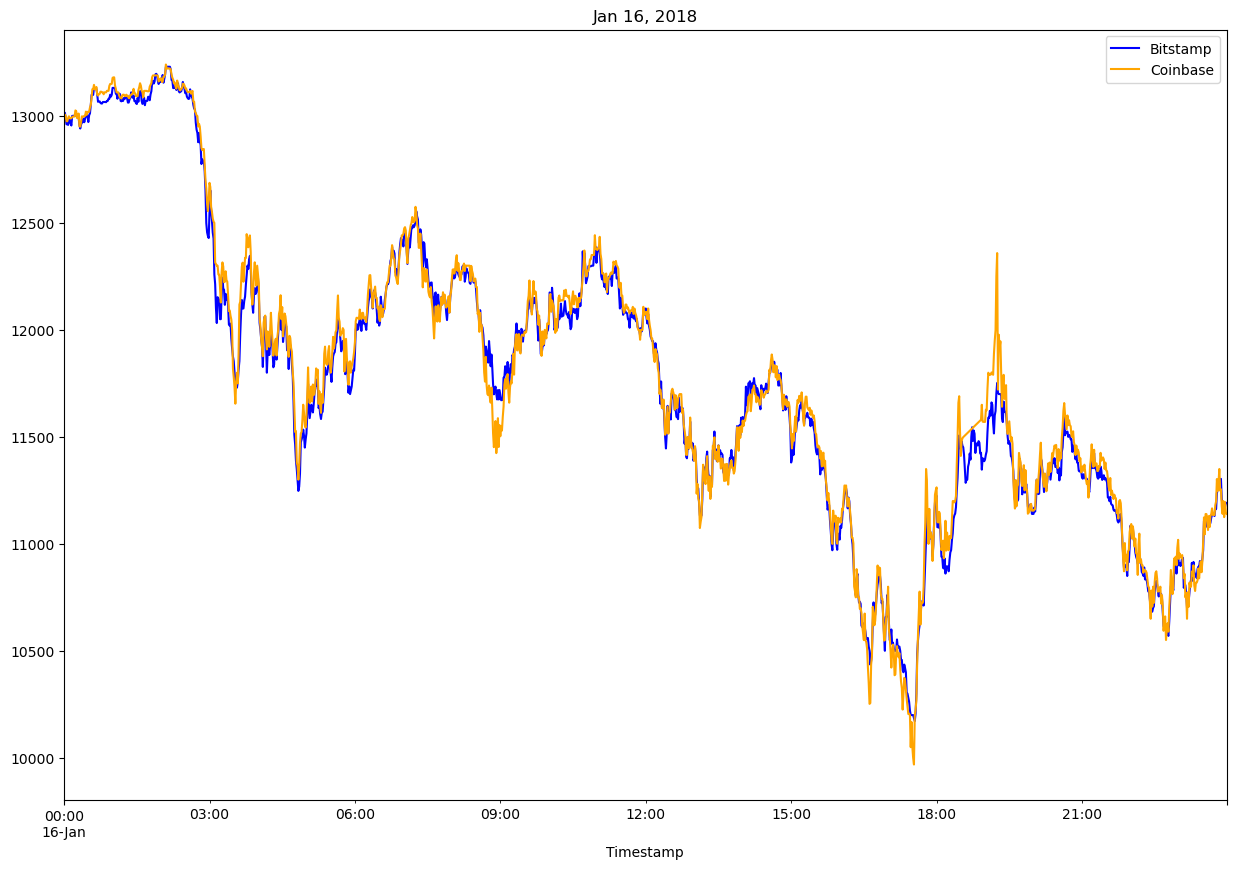

In [19]:
def check_specific_date(date):
    try:
        bitstamp['Close'].loc[date].plot(
            legend=True, figsize=(15, 10), title="Jan 16, 2018", color="blue", label="Bitstamp")
        coinbase['Close'].loc[date].plot(
            legend=True, figsize=(15, 10), color="orange", label="Coinbase")
    except: 
        check_specific_date(input('Specify Date: <2018-MM-DD>'))

user_date = input('Specify Date: <2018-MM-DD>')
check_specific_date(user_date)

In [22]:
arbitrage_difference = coinbase['Close'].loc[user_date] - bitstamp['Close'].loc[user_date]

arbitrage_difference.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Difference - Specific Date'}>

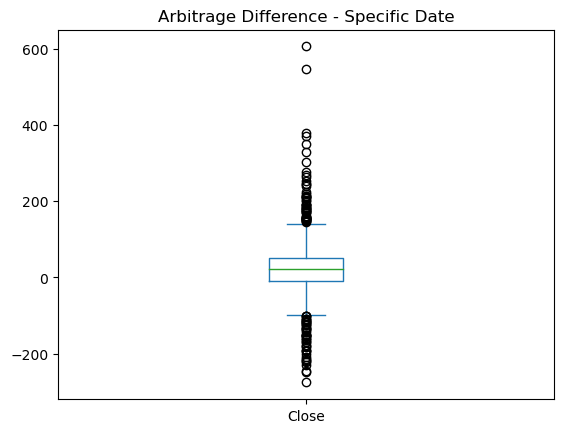

In [23]:
arbitrage_difference.plot(kind='box', title = f"Arbitrage Difference [{user_date}]" )

### Arbitrage Profits

In [27]:
# Statistical summary where the difference is greater than zero.
arbitrage_difference[arbitrage_difference > 0 ].describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [29]:
# Calculate the difference returns
diff_return= arbitrage_difference[arbitrage_difference > 0 ] / bitstamp['Close'].loc[user_date]
diff_return.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [30]:
# Determine the number of times your trades with positive returns exceed (.01) to cover costs
profitable_trades = diff_return[diff_return > .01]

# Check how many were profitable
len(profitable_trades.head())

5

In [32]:
# Statistical summary for profitable trades
profitable_trades.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [33]:
# Calculate the potential profit per trade in dollars 
profit_early = profitable_trades * bitstamp['Close'].loc[user_date]

profit_per_trade = profit_early.dropna()
display(profit_per_trade)

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade [2018-01-16]'}, xlabel='Timestamp'>

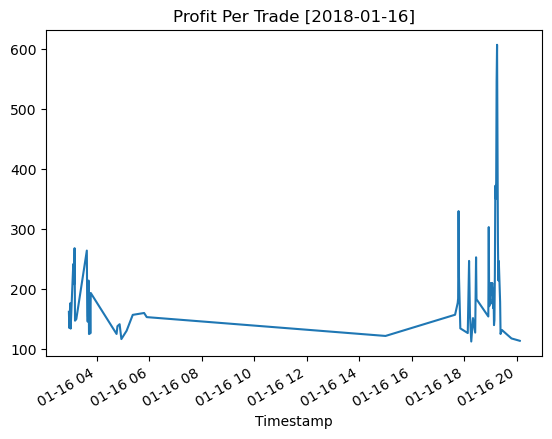

In [42]:
# Statistical summary for profits per trade
display(profit_per_trade.describe())
profit_per_trade.plot(title = f"Profit Per Trade [{user_date}]")

In [ ]:
# Sum of the potential profits
profit_per_trade.sum()

<AxesSubplot:title={'center':'Cumulative Sum [2018-01-16]'}, xlabel='Timestamp'>

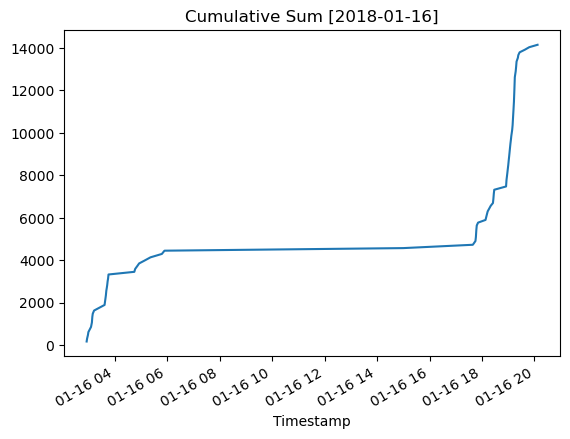

In [40]:
# Calculate the cumulative profits over time
cumulative_profit = profit_per_trade.cumsum()
cumulative_profit.plot(title = f"Cumulative Sum [{user_date}]")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits were harder to come by at the market for Bitcoin matures across time. Average profit spread per trade (found by looking at the `mean` value in the `describe` function conducted each day) declined from about 23 dollars early in the data, to about 3 dollars later in the data. As Bitcoin grows in popularity, the prices across the two exhanges trade more in line with one another. That makes it more and more difficult to find trading opportunities in which the price difference exceeds the minimum profit threshold of 1%.